<a href="https://colab.research.google.com/github/21700185-kimtaehong/Int_AI_sample/blob/main/hw5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import matplotlib.pyplot as plt

In [72]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#x_train.shape
# type(x_train[0,0,0])

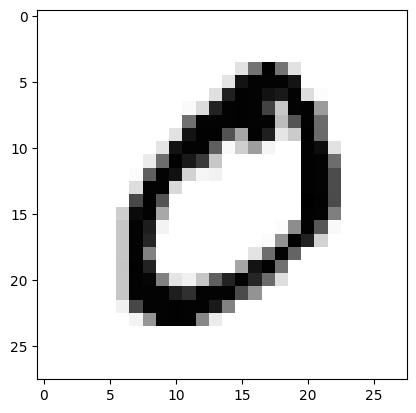

In [73]:
x_train = x_train.astype('float32') / 255.
n = 1
plt.imshow(x_train[n], cmap='Greys', interpolation='nearest')
# plt.show()

In [74]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
#x_train.shape
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
#input_shape

In [75]:
y_train[0:10]
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [76]:
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

In [77]:
import cv2

# 새 이미지와 이미지의 숫자가 들어갈 배열
mytest_images = []
mytest_labels = []

# # 배열에 이미지/숫자 추가, 이미지 resize, reshape
# for i in range(10):
#     img = cv2.imread(f"mytest_{i}.png", cv2.IMREAD_GRAYSCALE)
#     img = cv2.resize(img, (28, 28))
#     img = img.astype('float32') / 255.
#     mytest_images.append(img.reshape(28, 28, 1))
#     mytest_labels.append(i)

# 30개 이미지를 추가하기 위해 변경
for i in range(30):
    img = cv2.imread(f"mytest_{i}.png", cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = 255 - img  # Invert the colors if needed
    img = img.astype('float32') / 255.
    mytest_images.append(img.reshape(28, 28, 1))
    
    label = i % 10
    mytest_labels.append(label)

mytest_labels = keras.utils.to_categorical(mytest_labels, num_classes)
mytest_images = np.array(mytest_images)


In [78]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [79]:
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [80]:
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [81]:
batch_size = 128
epochs = 12

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(mytest_images, mytest_labels))

Epoch 1/12
469/469 [==============================] - 5s 7ms/step - loss: 0.1912 - accuracy: 0.9406 - val_loss: 0.5783 - val_accuracy: 0.8667
Epoch 2/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0621 - accuracy: 0.9803 - val_loss: 0.4276 - val_accuracy: 0.8667
Epoch 3/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0448 - accuracy: 0.9859 - val_loss: 0.4648 - val_accuracy: 0.8333
Epoch 4/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.3506 - val_accuracy: 0.9000
Epoch 5/12
469/469 [==============================] - 3s 7ms/step - loss: 0.0309 - accuracy: 0.9896 - val_loss: 0.5469 - val_accuracy: 0.8000
Epoch 6/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.5935 - val_accuracy: 0.8333
Epoch 7/12
469/469 [==============================] - 3s 6ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.3727 - val_accuracy: 0.9000
Epoch 

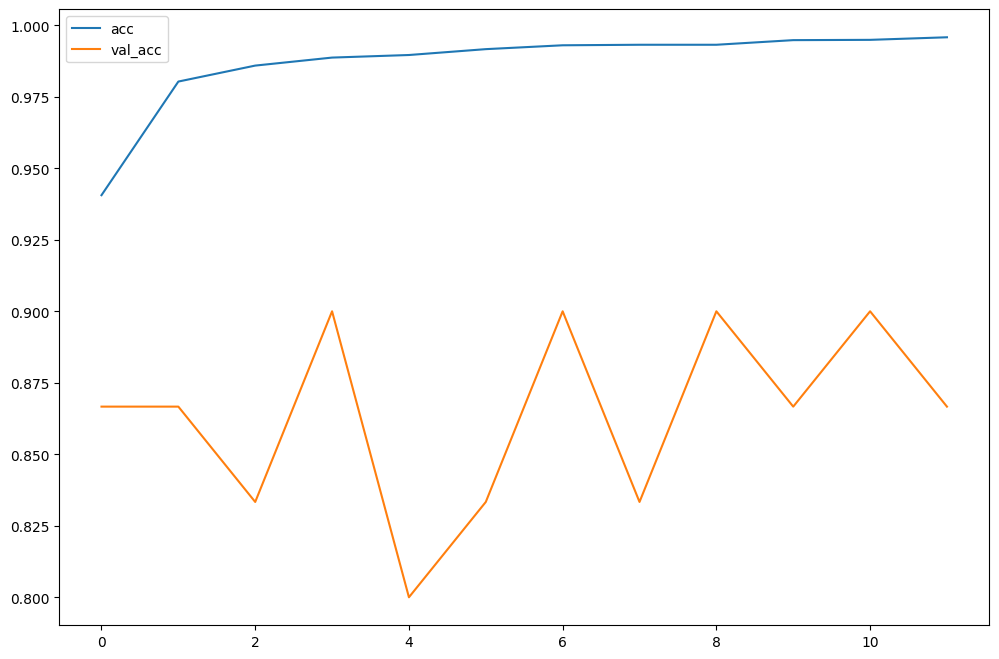

In [82]:
plt.figure(figsize=(12,8))
#plt.plot(hist.history['loss’])
#plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
#plt.legend(['loss','val_loss', 'acc','val_acc’])
plt.legend(['acc','val_acc'])
plt.show()

1/1 [==============================] - 0s 65ms/step


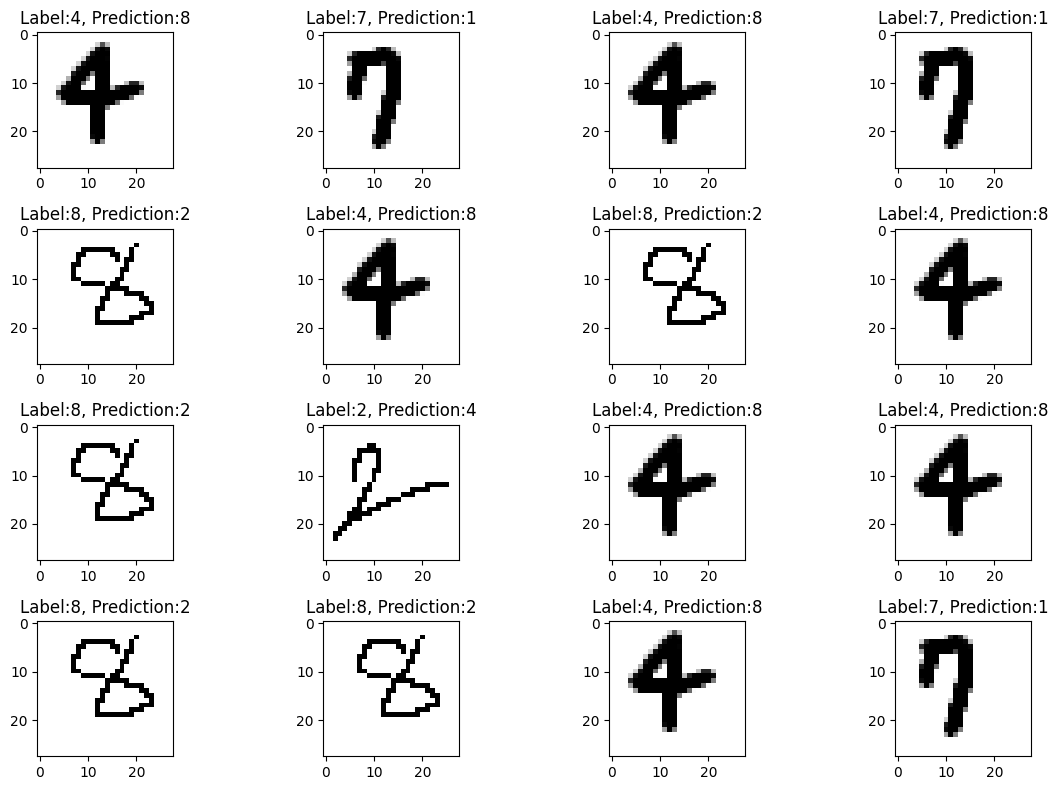

In [83]:
import random
# predicted_result = model.predict(x_test)
predicted_result = model.predict(mytest_images)

predicted_labels = np.argmax(predicted_result, axis=1)

# test_labels = np.argmax(y_test, axis=1)
mytest_labels = np.argmax(mytest_labels, axis=1)

wrong_result = []

# for n in range(0, len(test_labels)):
#   if predicted_labels[n] != test_labels[n]:
#     wrong_result.append(n)
for n in range(0, len(mytest_labels)):
  if predicted_labels[n] != mytest_labels[n]:
    wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)
count = 0
nrows = ncols = 4
plt.figure(figsize=(12,8))

# for n in samples:
#   count += 1
#   plt.subplot(nrows, ncols, count)
#   plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
#   tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
#   plt.title(tmp)
for n in samples:
  count += 1
  plt.subplot(nrows, ncols, count)
  plt.imshow(mytest_images[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
  tmp = "Label:" + str(mytest_labels[n]) + ", Prediction:" + str(predicted_labels[n])
  plt.title(tmp)

plt.tight_layout()
plt.show()